In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset=pd.read_csv(r"C:\Users\hp\Desktop/earthquake_1995-2023.csv",encoding='utf-8')
dataset.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [3]:
dataset.drop(columns=['cdi', 'mmi', 'continent', 'tsunami', 'alert', 'sig', 'net', 'nst', 'dmin', 'gap','country'], inplace=True)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   magType    1000 non-null   object 
 4   depth      1000 non-null   float64
 5   latitude   1000 non-null   float64
 6   longitude  1000 non-null   float64
 7   location   994 non-null    object 
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


In [5]:
dataset.describe()

,magnitude,depth,latitude,longitude
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,74.612541,4.315554,51.486576
std,0.438148,130.812590,26.633320,117.478302
min,6.500000,2.700000,-61.848400,-179.968000
25%,6.600000,16.000000,-13.518500,-71.694450
50%,6.800000,29.000000,-2.443500,107.791000
75%,7.100000,55.000000,25.167250,148.364750
max,9.100000,670.810000,71.631200,179.662000


In [6]:
duplicates = dataset[dataset.duplicated()]
print(duplicates)

                                   title  magnitude         date_time magType  \
68  M 6.5 - 71 km SE of Nikolski, Alaska        6.5  11-01-2022 12:39      Mi   
71  M 6.7 - 91 km SE of Nikolski, Alaska        6.7  11-01-2022 11:35      Mi   

    depth  latitude  longitude          location  
68   37.0    52.502   -168.080  Nikolski, Alaska  
71   33.0    52.480   -167.736  Nikolski, Alaska  


In [7]:
dataset = dataset.drop_duplicates()

In [8]:
dataset.isna().sum()

title        0
magnitude    0
date_time    0
magType      0
depth        0
latitude     0
longitude    0
location     6
dtype: int64

In [9]:
dataset.dropna(subset=['location'])

,title,magnitude,date_time,magType,depth,latitude,longitude,location
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu"
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador"
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina"
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska"
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,Mi,21.000,54.4900,-160.7960,Alaska Peninsula
...,...,...,...,...,...,...,...,...
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,27-05-1995 13:03,mwb,11.000,52.6290,142.8270,"Tungor, Russia"
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,16-05-1995 20:12,mw,20.200,-23.0080,169.9000,"Vao, New Caledonia"
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,14-05-1995 11:33,mw,11.200,-8.3780,125.1270,"Maubara, Timor Leste"
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,13-05-1995 08:47,mw,14.000,40.1490,21.6950,"Aianí, Greece"


In [10]:
dataset['date_time'] = pd.to_datetime(dataset['date_time'], format='%d-%m-%Y %H:%M')
dataset['date_time']

0     2023-08-16 12:47:00
1     2023-07-19 00:22:00
2     2023-07-17 03:05:00
3     2023-07-16 06:48:00
4     2023-07-16 06:48:00
              ...        
995   1995-05-27 13:03:00
996   1995-05-16 20:12:00
997   1995-05-14 11:33:00
998   1995-05-13 08:47:00
999   1995-05-05 03:53:00
Name: date_time, Length: 998, dtype: datetime64[ns]

In [11]:
dataset.to_csv(r'C:\Users\hp\Desktop/cleaned_data.csv', index=False)

In [12]:
mag_mode = dataset['magnitude'].mode()
print(mag_mode)

0    6.5
Name: magnitude, dtype: float64


In [13]:
loc_mode = dataset['location'].mode()
print(loc_mode)

0    Kokopo, Papua New Guinea
Name: location, dtype: object


In [14]:
mean_mag = dataset['magnitude'].mean()
median_mag = dataset['magnitude'].median()
std_mag = dataset['magnitude'].std()
print("magnitude mean is ",mean_mag)
print("magnitude median is ",median_mag)
print("magnitude std is ",std_mag)


magnitude mean is  6.940831663326654
magnitude median is  6.8
magnitude std is  0.43829913084986843


In [15]:
dataset.sort_values(by='magnitude', ascending=False, inplace=True)
dataset.head(10)

,title,magnitude,date_time,magType,depth,latitude,longitude,location
511,"M 9.1 - 2011 Great Tohoku Earthquake, Japan",9.1,2011-03-11 05:46:00,mww,29.00,38.2970,142.3730,"2011 Great Tohoku Earthquake, Japan"
703,M 9.1 - 2004 Sumatra - Andaman Islands Earthquake,9.1,2004-12-26 00:58:00,mw,30.00,3.2950,95.9820,2004 Sumatra - Andaman Islands Earthquake
552,"M 8.8 - 36 km WNW of Quirihue, Chile",8.8,2010-02-27 06:34:00,mww,22.90,-36.1220,-72.8980,"Quirihue, Chile"
476,M 8.6 - off the west coast of northern Sumatra,8.6,2012-04-11 08:38:00,mw,20.00,2.3270,93.0630,off the west coast of northern Sumatra
692,"M 8.6 - 78 km WSW of Singkil, Indonesia",8.6,2005-03-28 16:09:00,mww,30.00,2.0850,97.1080,"Singkil, Indonesia"
802,"M 8.4 - 6 km SSW of Atico, Peru",8.4,2001-06-23 20:33:00,mww,33.00,-16.2650,-73.6410,"Atico, Peru"
628,"M 8.4 - 122 km SW of Bengkulu, Indonesia",8.4,2007-09-12 11:10:00,mww,34.00,-4.4380,101.3670,"Bengkulu, Indonesia"
649,M 8.3 - Kuril Islands,8.3,2006-11-15 11:14:00,mwc,10.00,46.5920,153.2660,Kuril Islands
320,"M 8.3 - 48 km W of Illapel, Chile",8.3,2015-09-16 22:54:00,mww,22.44,-31.5729,-71.6744,"Illapel, Chile"
428,M 8.3 - Sea of Okhotsk,8.3,2013-05-24 05:44:00,mww,598.10,54.8920,153.2210,Okhotsk


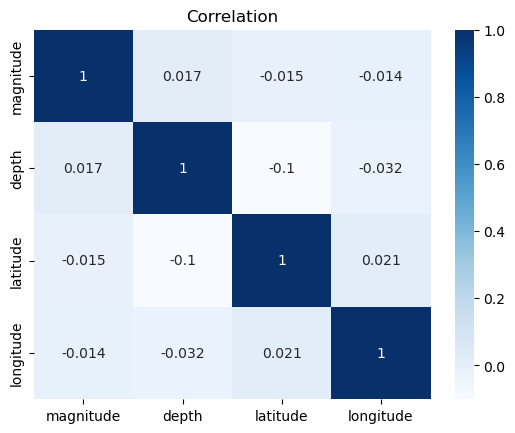

In [16]:
num_col = dataset.select_dtypes(include=[np.number])
corr= num_col.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation')
plt.show()

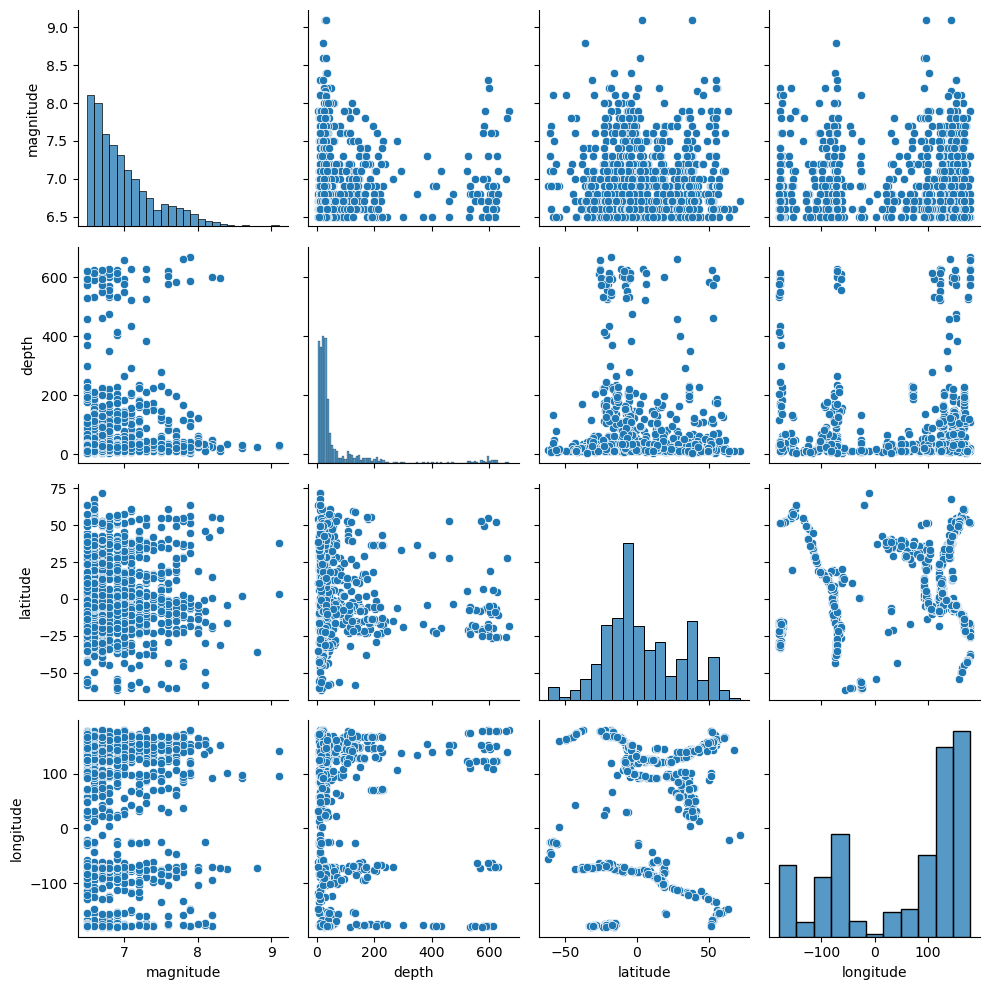

In [17]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
sns.pairplot(dataset[['magnitude', 'depth', 'latitude', 'longitude']])
plt.tight_layout()
plt.show()

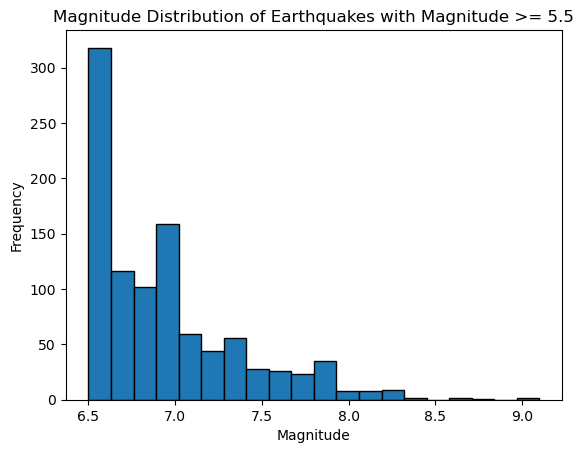

In [18]:
high_mag_earthquakes = dataset[dataset['magnitude'] >= 5.5]
plt.hist(high_mag_earthquakes['magnitude'], bins=20, edgecolor='black')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Magnitude Distribution of Earthquakes with Magnitude >= 5.5')
plt.show()

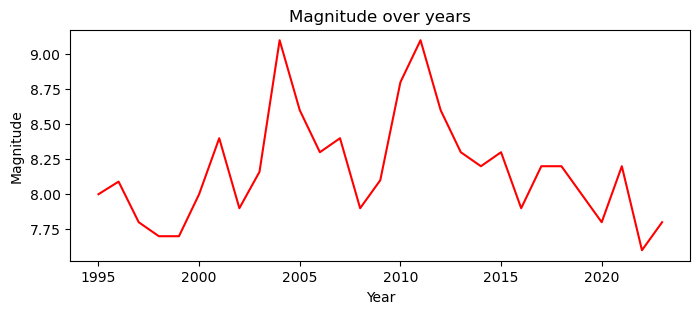

In [19]:
dataset['year'] = dataset['date_time'].dt.year
plt.figure(figsize=(8, 3))
largest_magnitude= dataset.loc[dataset.groupby('year')['magnitude'].idxmax()]
plt.plot(largest_magnitude['year'], largest_magnitude['magnitude'], color='red')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.title('Magnitude over years')
plt.show()

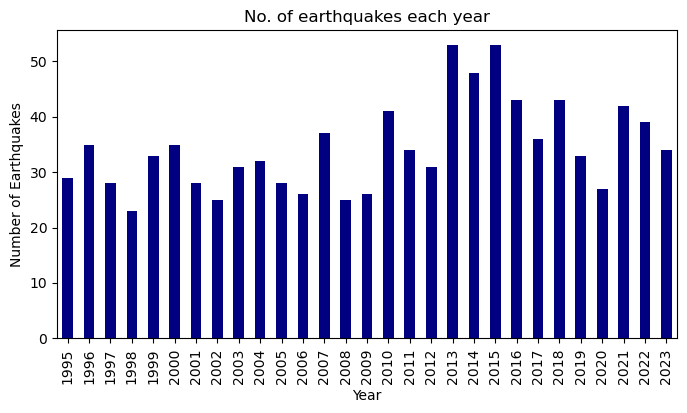

In [20]:
plt.figure(figsize=(8, 4))
data = dataset.groupby('year').size()
data.plot(kind='bar', color='navy')
plt.title('No. of earthquakes each year')
plt.ylabel('Number of Earthquakes')
plt.xlabel('Year')
plt.show()

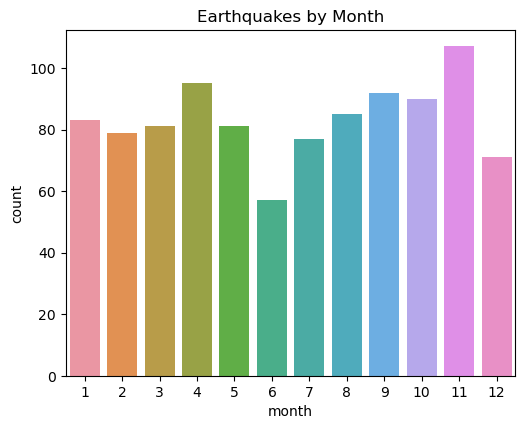

In [21]:
dataset['month'] = dataset['date_time'].dt.month
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.countplot(x='month', data=dataset)
plt.title('Earthquakes by Month')
plt.tight_layout()
plt.show()

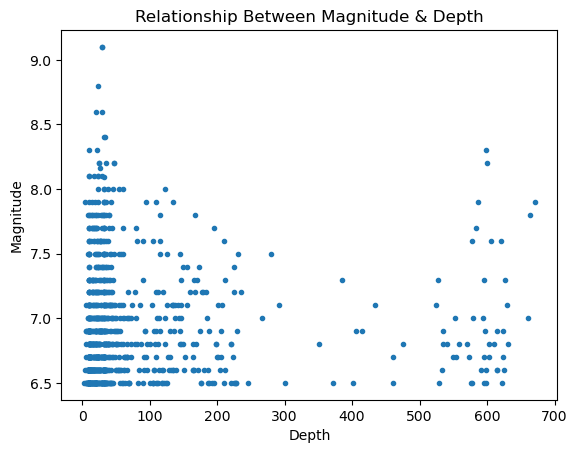

In [22]:
x='depth'
y='magnitude'
plt.scatter(x,y, data=dataset,marker='.')
plt.title('Relationship Between Magnitude & Depth')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.show()

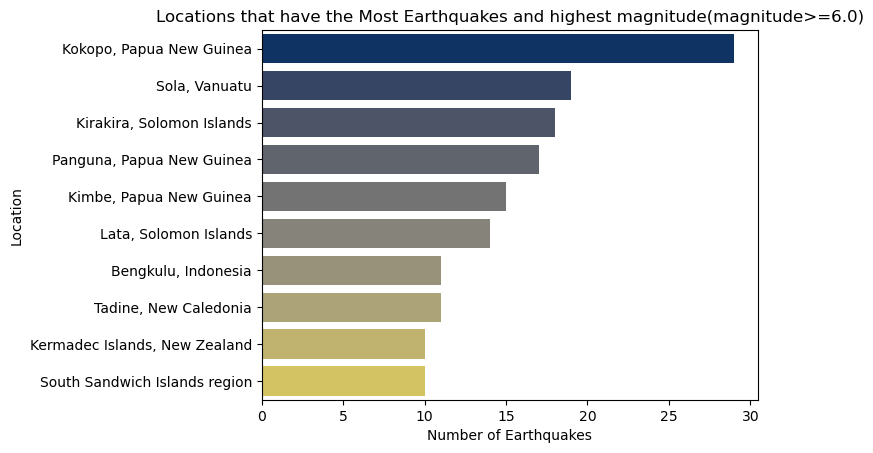

In [23]:
num_loc = dataset['location'].value_counts().sort_values(ascending=False)
max_loc = num_loc.head(10)  
sns.barplot(x=max_loc.values, y=max_loc.index, palette='cividis')
plt.title('Locations that have the Most Earthquakes and highest magnitude(magnitude>=6.0)')
plt.xlabel('Number of Earthquakes')
plt.ylabel('Location')
plt.show()

Mean Squared Error: 0.16629727910509512
R-squared: -0.004251875171956465


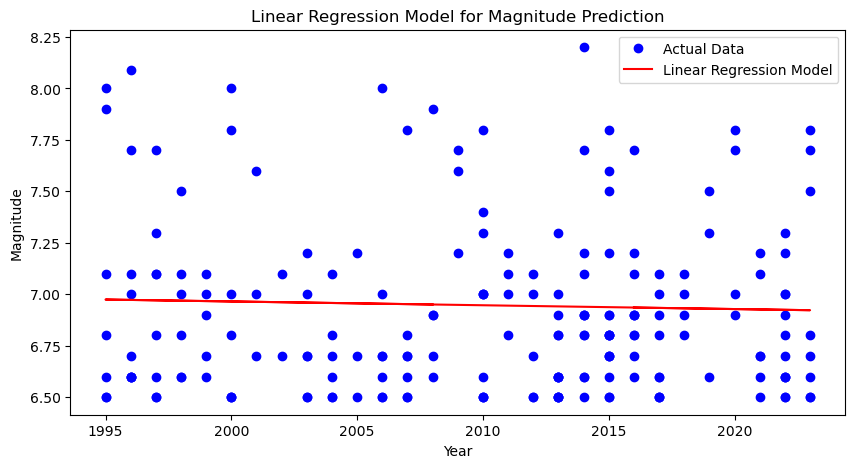

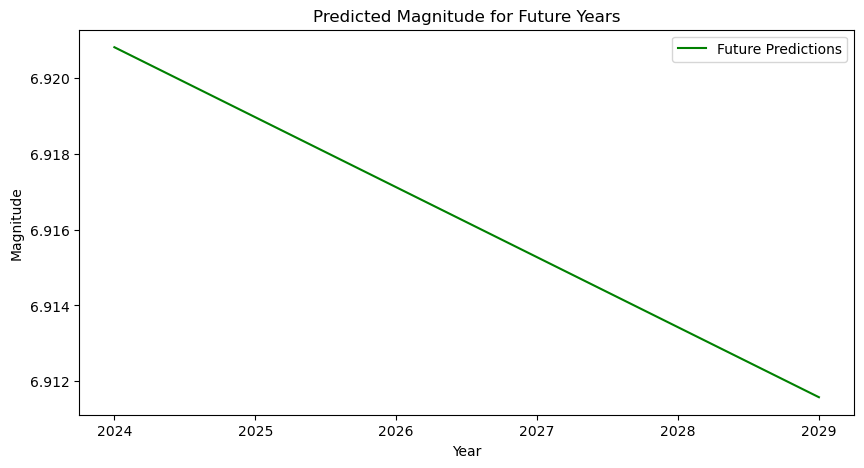

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
features = dataset[['year']]
target = dataset['magnitude']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
future_years = pd.DataFrame({'year': range(2024, 2030)})
future_predictions = model.predict(future_years)
plt.figure(figsize=(10, 5))
plt.plot(X_test, y_test, 'bo', label='Actual Data')
plt.plot(X_test, predictions, 'r-', label='Linear Regression Model')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.title('Linear Regression Model for Magnitude Prediction')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(future_years, future_predictions, 'g-', label='Future Predictions')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.title('Predicted Magnitude for Future Years')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = dataset[['depth']]
y = dataset['magnitude']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
degree = 2  
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred = poly_model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.title('Polynomial Regression for Earthquake Magnitude Prediction')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.legend()
plt.show()
